# Overview
In this notebook, we examine the intersubject correlation for the single trials
* Here, I mask the data with the brainmask_canlab data and resample it to 3mm (native space is 2.7mm)
* This code plots the results from ISC.py in this repository 
* https://github.com/jungheejung/cue_expectancy/blob/main/scripts/step10_nilearn/glm_diagnostics/corr_singletrial-SPM/step02_ISC.py
* I calculate the correlation across participants in a voxelwise manner. 

### libraries

In [2]:
from nilearn import (plotting, image, masking, maskers)
from nilearn.datasets import (load_mni152_template)
import os
import numpy as np
from os.path import join
import matplotlib.pyplot as plt

### functions

In [3]:
def fisher_mean(correlation, axis=None):
    return np.tanh(np.nanmean(np.arctanh(correlation), axis=axis))

### mask (canlab mask) resampled into 3mm 
* functional native space is 2.7mm

In [4]:
template = load_mni152_template(resolution=3)

high_cue = '/Volumes/spacetop_projects_cue/analysis/fmri/nilearn/deriv07_isc/sub-avg_ses-avg_run-avg_event-stimulus_cuetype-high.nii.gz'
low_cue = '/Volumes/spacetop_projects_cue/analysis/fmri/nilearn/deriv07_isc/sub-avg_ses-avg_run-avg_event-stimulus_cuetype-low.nii.gz'

In [5]:
ref_img = image.load_img(high_cue)
canlab_dir = '/Users/h/Documents/MATLAB/CanlabCore' ## canlab_dir = '/dartfs-hpc/rc/lab/C/CANlab/modules/CanlabCore'
mask = image.load_img(join(canlab_dir, 'CanlabCore/canlab_canonical_brains/Canonical_brains_surfaces/brainmask_canlab.nii'))

mask_img = image.resample_to_img(masking.compute_epi_mask(mask), template) #, target_affine=ref_img.affine, target_shape=ref_img.shape)
print(f"* mask shape after resampling to MNI 3mm: {mask_img.shape}")

original_voxel_size = ref_img.header.get_zooms()
nifti_masker = maskers.NiftiMasker(mask_img=mask_img) #, target_affine=template.affine, target_shape=target_shape) #, target_affine=mask_affine, target_shape=target_shape, memory_level=1)

* mask shape after resampling to MNI 3mm: (67, 79, 64)


/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/nilearn/image/resampling.py:294: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  warnings.warn(


### apply mask to functional data and get the average fisher-z score of the maps

/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:98: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(


    * array shape: (1, 71977)
    * fisher z transformed average value: 0.16031165421009064


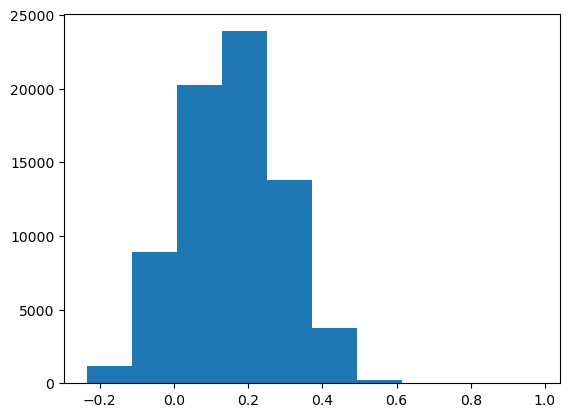

In [6]:
array = nifti_masker.fit_transform(high_cue)
print(f"    * array shape: {array.shape}")
plt.hist(array[0])
print(f"    * fisher z transformed average value: {fisher_mean(array)}")

In [9]:
masked_array = nifti_masker.inverse_transform(array)
print(f"    * masked functional shape: {masked_array.shape}")

    * masked functional shape: (67, 79, 64, 1)


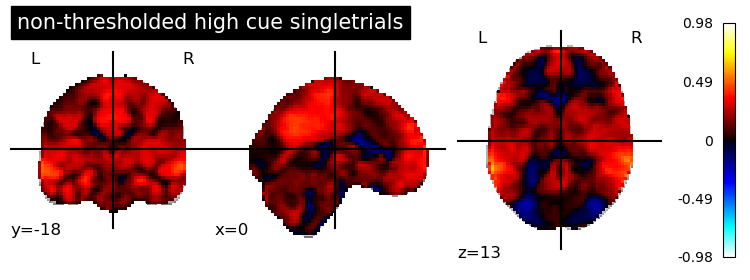

In [10]:
plotting.plot_stat_map(masked_array, title=f"non-thresholded high cue singletrials")

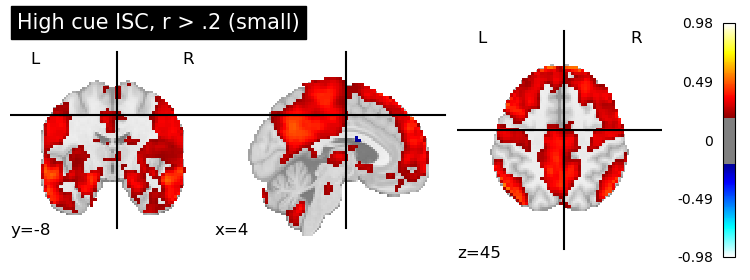

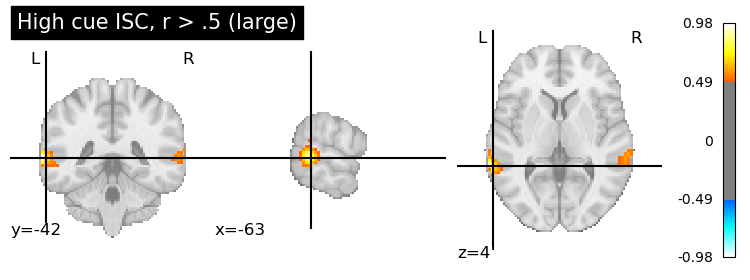

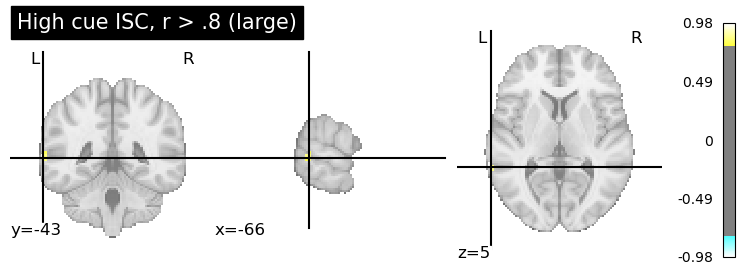

In [11]:
plotting.plot_stat_map(masked_array, threshold=.2, title=f"High cue ISC, r > .2 (small)")
plotting.plot_stat_map(masked_array, threshold=.5, title=f"High cue ISC, r > .5 (large)")
plotting.plot_stat_map(masked_array, threshold=.8, title=f"High cue ISC, r > .8 (large)")


# low cue

/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:98: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(


    * array shape: (1, 71977)
    * fisher z transformed average value: 0.1606694608926773
    * double check masked shape: (67, 79, 64, 1)


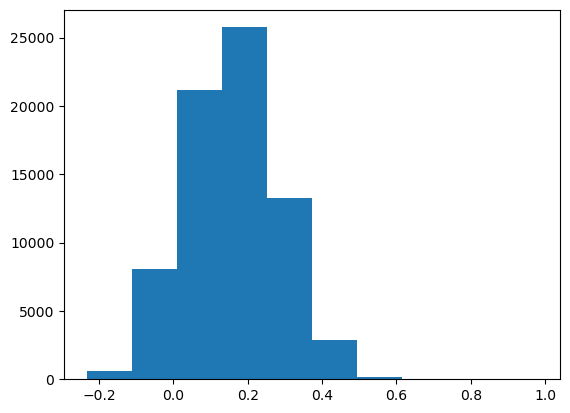

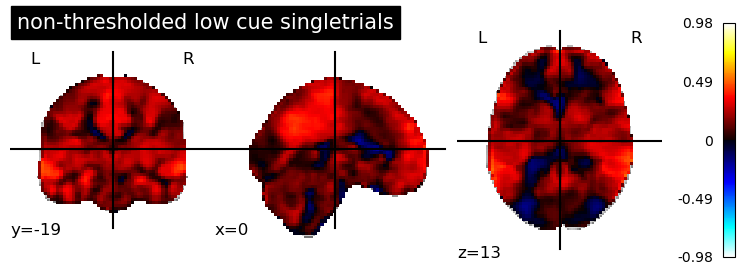

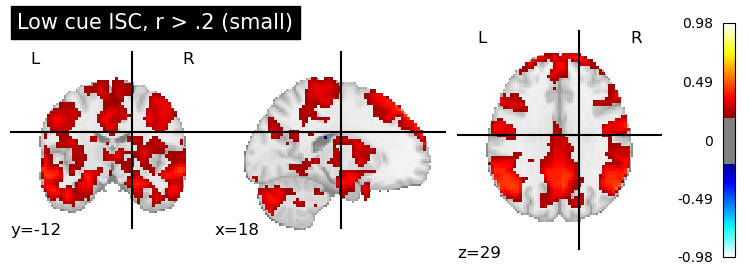

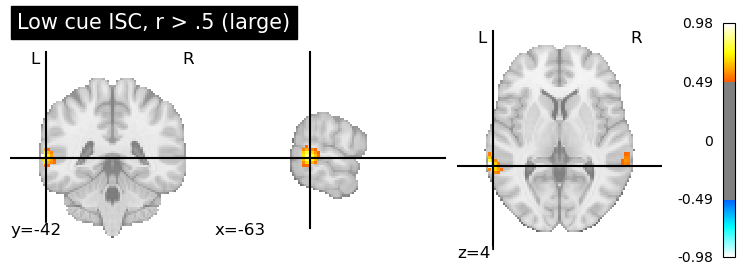

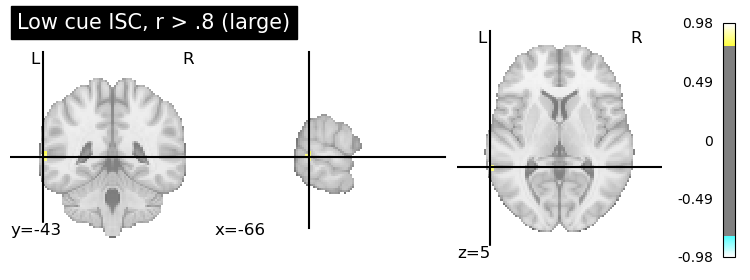

In [12]:
Larray = nifti_masker.fit_transform(low_cue)
print(f"    * array shape: {array.shape}")
plt.hist(Larray[0])
print(f"    * fisher z transformed average value: {fisher_mean(Larray)}")
masked_Larray= nifti_masker.inverse_transform(Larray)
print(f"    * double check masked shape: {masked_Larray.shape}")
plotting.plot_stat_map(masked_Larray, title=f"non-thresholded low cue singletrials")
plotting.plot_stat_map(masked_Larray, threshold=.2, title=f"Low cue ISC, r > .2 (small)")
plotting.plot_stat_map(masked_Larray, threshold=.5, title=f"Low cue ISC, r > .5 (large)")
plotting.plot_stat_map(masked_Larray, threshold=.8, title=f"Low cue ISC, r > .8 (large)")
